The way CNNs are scaled up nowadays to enhance performance can be gisted in three main directions:
- Scaling up the depth
- Scaling up the width
- Scaling up the resolution

However, this process involves a lot of manual tuning and often results suboptimal performance. 

In their ICML 2019 paper [EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks](https://arxiv.org/abs/1905.11946), the Google AI team investigated this and showed a very unique solution. The central question answered in the paper is ([source](https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html)):
> What if, instead, we could find a more principled method to scale up a CNN to obtain better accuracy and efficiency?

Here's a plot taken from their paper which shows the kind of result EfficientNet models were able to achieve:

![](https://1.bp.blogspot.com/-oNSfIOzO8ko/XO3BtHnUx0I/AAAAAAAAEKk/rJ2tHovGkzsyZnCbwVad-Q3ZBnwQmCFsgCEwYBhgL/s640/image3.png)

As can be seen in the above figure, the improvement is not minor, it is quite significant to consider. 

At a very high level, they achieve this by **_compound scaling_**. Compound scaling refers to systematically scaling up the dimensions (depth, width, resolution) together instead of focusing on just one at a time. EfficientNets first start with a baseline network under the available hardware resources. Then an extensive grid search is performed to find the coefficients for the different dimensions so as to determine the amount of scaling required. 

The performance of EfficientNet models are heavily dependent on the baseline network however. To get past this depedency, the authors presented a new baseline networks which they developed by using [Neural Architecture Search](https://en.wikipedia.org/wiki/Neural_architecture_search) and the architecture of this network is as follows ([source](https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html)):

![](https://1.bp.blogspot.com/-DjZT_TLYZok/XO3BYqpxCJI/AAAAAAAAEKM/BvV53klXaTUuQHCkOXZZGywRMdU9v9T_wCLcBGAs/s640/image2.png)

What is more appealing to me is EfficientNet models trained on the classic ImageNet dataset have shown extra ordinary performance on other datasets (CIFAR100, Oxford-IIIT Pets, Birdsnap, Food-101 etc.) via transfer learning  ([source](https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html)) - 

![](https://cdn-images-1.medium.com/max/800/1*uPgdvgxsH5hYXVJ6mfC2RA.jpeg)

According to me the main contributions of this paper lie in - 
- Showcasing a technique that can scale up a CNN but do not explode in the number of parameters (up to 21x parameter reduction)
- Faster inference time in mobile devices

This is indeed a huge leap in guiding the further direction for deep learning for computer vision tasks. The authors have opensourced their implementation which can be found [here](https://github.com/tensorflow/tpu/blob/master/models/official/efficientnet). They have provided EfficientNet checkpoints for EfficientNet-B0, EfficientNet-B1, EfficientNet-B2, and EfficientNet-B3. B denotes block of layers and higher the number after B, more the complexity. 


Here are some examples to show how to load and use EfficientNet models  in Jupyter Notebook environments - 

We would need the EfficientNet Python scripts from the official GitHub repo to make inference. 

In [2]:
%%bash
git clone https://github.com/tensorflow/tpu

Cloning into 'tpu'...


In [0]:
# Setup path
import sys
sys.path.append('/content/tpu/models/official/efficientnet')
sys.path.append('/content/tpu/models/common')

In [0]:
import  eval_ckpt_main as eval_ckpt

In [15]:
# Download an image
%%bash
wget https://img.purch.com/w/660/aHR0cDovL3d3dy5saXZlc2NpZW5jZS5jb20vaW1hZ2VzL2kvMDAwLzEwMC8zNDkvb3JpZ2luYWwvc2liZXJpYW4tdGlnZXIuanBn -O tiger.jpg

--2019-06-01 11:10:06--  https://img.purch.com/w/660/aHR0cDovL3d3dy5saXZlc2NpZW5jZS5jb20vaW1hZ2VzL2kvMDAwLzEwMC8zNDkvb3JpZ2luYWwvc2liZXJpYW4tdGlnZXIuanBn
Resolving img.purch.com (img.purch.com)... 184.27.69.35
Connecting to img.purch.com (img.purch.com)|184.27.69.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94015 (92K) [image/jpeg]
Saving to: ‘tiger.jpg’

     0K .......... .......... .......... .......... .......... 54% 3.93M 0s
    50K .......... .......... .......... .......... .         100% 3.04M=0.03s

2019-06-01 11:10:06 (3.47 MB/s) - ‘tiger.jpg’ saved [94015/94015]



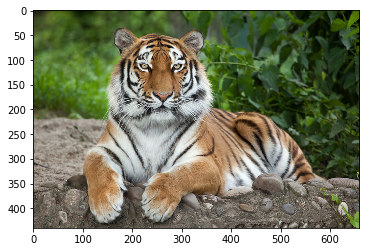

In [20]:
import matplotlib.pyplot as plt

def show_image(img_name):
  img = plt.imread(img_name)
  plt.imshow(img)
  plt.show()

show_image('tiger.jpg')

In [17]:
import  eval_ckpt_main as eval_ckpt
import tensorflow as tf

# Load up the checkpoint from GCS
# Load up the ImageNet labels from GCS
b0_checkpoint = 'gs://cloud-tpu-checkpoints/efficientnet/efficientnet-b0'
labels = 'gs://cloud-tpu-checkpoints/efficientnet/eval_data/labels_map.txt'

# Inference
pred_idx, pred_prob = eval_ckpt.eval_example_images(
    'efficientnet-b0', b0_checkpoint, ['tiger.jpg'], labels)

predicted class for image tiger.jpg: 
  -> top_0 (67.93%): tiger, Panthera tigris  
  -> top_1 (23.59%): tiger cat  
  -> top_2 (0.37%): lynx, catamount  
  -> top_3 (0.08%): zebra  
  -> top_4 (0.08%): jaguar, panther, Panthera onca, Felis onca  


### Same thing on another image

In [18]:
%%bash 
wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSeZ2LZKdmII7_ksliA_3Tuli4EogRjgT-dMmibOtRLK7tiPvpR -O dog.png

--2019-06-01 11:13:09--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSeZ2LZKdmII7_ksliA_3Tuli4EogRjgT-dMmibOtRLK7tiPvpR
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.141.138, 74.125.141.100, 74.125.141.101, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.141.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5767 (5.6K) [image/jpeg]
Saving to: ‘dog.png’

     0K .....                                                 100% 42.1M=0s

2019-06-01 11:13:09 (42.1 MB/s) - ‘dog.png’ saved [5767/5767]



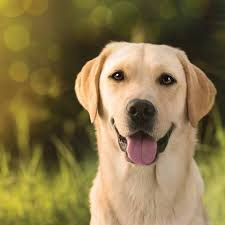

In [23]:
from IPython import display

display.display(display.Image('dog.png'))

In [19]:
pred_idx, pred_prob = eval_ckpt.eval_example_images(
    'efficientnet-b0', b0_checkpoint, ['dog.png'], labels)

predicted class for image dog.png: 
  -> top_0 (87.43%): Labrador retriever  
  -> top_1 (4.04%): golden retriever  
  -> top_2 (0.36%): kuvasz  
  -> top_3 (0.31%): Chesapeake Bay retriever  
  -> top_4 (0.31%): Rhodesian ridgeback  


I am now interested in checking out how `ResNet50` would the above two images. Specifically I am interested in seeing the top-5 accuracy. I will now switch to TensorFlow 2.0 for ease of use and convenience. 

In [0]:
!pip install tensorflow==2.0.0-alpha0

In [1]:
import tensorflow as tf

tf.__version__

'2.0.0-alpha0'

In [0]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [0]:
model = ResNet50(weights='imagenet')

In [0]:
def load_predict(image_path):
  img = image.load_img(image_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  preds = model.predict(x)
  return 'Predicted: {}'.format(decode_predictions(preds, top=5)[0])

In [5]:
load_predict('dog.png')

"Predicted: [('n02099712', 'Labrador_retriever', 0.81154644), ('n02099601', 'golden_retriever', 0.17288084), ('n02087394', 'Rhodesian_ridgeback', 0.0019452219), ('n02099849', 'Chesapeake_Bay_retriever', 0.0019304137), ('n02104029', 'kuvasz', 0.0018416079)]"

In [6]:
load_predict('tiger.jpg')

"Predicted: [('n02129604', 'tiger', 0.90761775), ('n02123159', 'tiger_cat', 0.08977664), ('n02127052', 'lynx', 0.0019185364), ('n02128925', 'jaguar', 0.00038524394), ('n02128385', 'leopard', 4.5873516e-05)]"